# Titanic Survival Prediction

In [1]:
#Importing The Required libraries 
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
#getting the data
titanic=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA 

In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Tornquist, Mr. William Henry",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


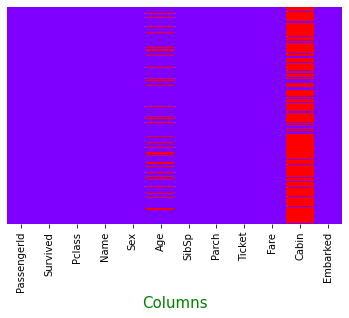

In [7]:
#Plotting the Null values on heatmap
plt.figure(figsize=(6,4))
sns.heatmap(titanic.isnull(),cmap='rainbow',yticklabels=False,cbar=False)
plt.xlabel('Columns',fontsize=15,color='g')
plt.show()

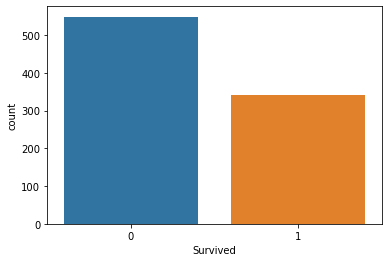

0    549
1    342
Name: Survived, dtype: int64


In [8]:
#Analyzing the survival
sns.countplot(x='Survived',data=titanic)
plt.show()
print(titanic['Survived'].value_counts())

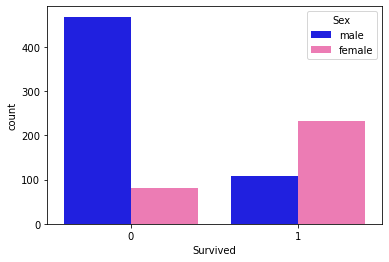

In [9]:
#Analyzing the survival as per Sex
sns.countplot(x='Survived',hue='Sex',data=titanic,color='g',palette={'male':'b','female':'hotpink'})
plt.show()

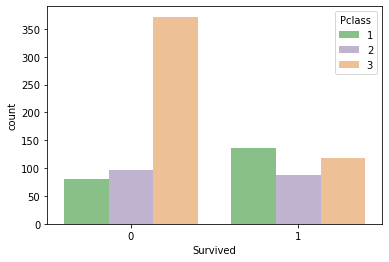

In [10]:
#Analyzing the survival as per Class
sns.countplot(x='Survived',hue='Pclass',data=titanic,color='g',palette='Accent')
plt.show()

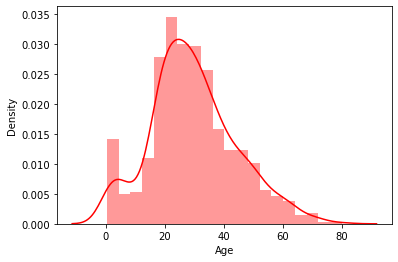

In [11]:
sns.distplot(titanic['Age'].dropna(),color='r')
plt.show()

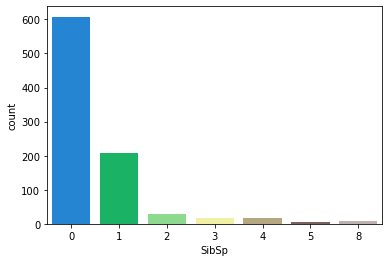

In [12]:
sns.countplot(x='SibSp',data=titanic,color='g',palette='terrain')
plt.show()

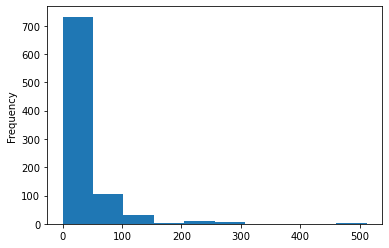

In [13]:
titanic["Fare"].plot.hist()
plt.show()

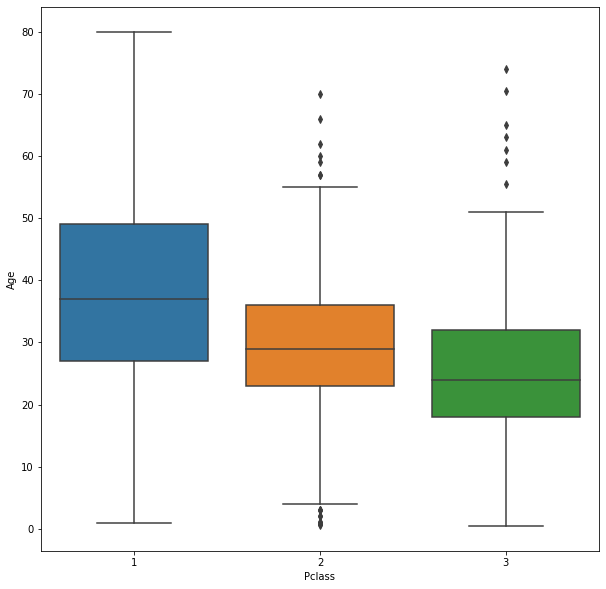

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

In [15]:
#Filling the null values
imp=SimpleImputer(strategy='median')
titanic['Age']=imp.fit_transform(titanic['Age'].values.reshape(-1,1))
for i in titanic['Age']:
    round(i)

In [16]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Dropping the columns with least impact on Survival
titanic.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [18]:
titanic.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q


In [19]:
#Transforming the categorical values to numeric for model formation
la=LabelEncoder()
list1=["Sex","Embarked"]
for i in list1:
    titanic[i]=la.fit_transform((titanic[i].astype(str)))

In [20]:
titanic.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1


# Spliting the Data Into features and vectors

In [21]:
x=titanic.drop("Survived",axis=1)
y=titanic['Survived']

In [22]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0


In [23]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Building Models

**1st Prediction with LogisticRegression Model**

In [24]:
for i in range(1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=i)
    lr=LogisticRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    print(accuracy_score(ytest,pred),f'at {i}')

0.7898305084745763 at 0
0.7762711864406779 at 1
0.7966101694915254 at 2
0.7627118644067796 at 3
0.8271186440677966 at 4
0.8203389830508474 at 5
0.8372881355932204 at 6
0.7694915254237288 at 7
0.8101694915254237 at 8
0.8 at 9
0.8067796610169492 at 10
0.8135593220338984 at 11
0.7728813559322034 at 12
0.8 at 13
0.7966101694915254 at 14
0.7898305084745763 at 15
0.7830508474576271 at 16
0.7694915254237288 at 17
0.8169491525423729 at 18
0.8135593220338984 at 19
0.7830508474576271 at 20
0.8033898305084746 at 21
0.7830508474576271 at 22
0.7728813559322034 at 23
0.8135593220338984 at 24
0.7830508474576271 at 25
0.7864406779661017 at 26
0.7932203389830509 at 27
0.7593220338983051 at 28
0.7728813559322034 at 29
0.8033898305084746 at 30
0.7796610169491526 at 31
0.7864406779661017 at 32
0.8203389830508474 at 33
0.8203389830508474 at 34
0.8033898305084746 at 35
0.823728813559322 at 36
0.8 at 37
0.8372881355932204 at 38
0.8 at 39
0.8067796610169492 at 40
0.8101694915254237 at 41
0.8203389830508474 at

0.8 at 335
0.7796610169491526 at 336
0.8033898305084746 at 337
0.7932203389830509 at 338
0.7898305084745763 at 339
0.7661016949152543 at 340
0.8305084745762712 at 341
0.7457627118644068 at 342
0.7864406779661017 at 343
0.7932203389830509 at 344
0.8033898305084746 at 345
0.7491525423728813 at 346
0.7830508474576271 at 347
0.7694915254237288 at 348
0.7796610169491526 at 349
0.8033898305084746 at 350
0.8067796610169492 at 351
0.7728813559322034 at 352
0.8 at 353
0.8033898305084746 at 354
0.7661016949152543 at 355
0.8135593220338984 at 356
0.8169491525423729 at 357
0.8067796610169492 at 358
0.7559322033898305 at 359
0.7932203389830509 at 360
0.7898305084745763 at 361
0.7898305084745763 at 362
0.8067796610169492 at 363
0.7932203389830509 at 364
0.8101694915254237 at 365
0.7898305084745763 at 366
0.7593220338983051 at 367
0.8135593220338984 at 368
0.7966101694915254 at 369
0.7864406779661017 at 370
0.7762711864406779 at 371
0.7762711864406779 at 372
0.7932203389830509 at 373
0.76610169491525

0.8169491525423729 at 665
0.7898305084745763 at 666
0.7898305084745763 at 667
0.7796610169491526 at 668
0.7966101694915254 at 669
0.8 at 670
0.8033898305084746 at 671
0.752542372881356 at 672
0.7966101694915254 at 673
0.7762711864406779 at 674
0.7932203389830509 at 675
0.7864406779661017 at 676
0.8203389830508474 at 677
0.7593220338983051 at 678
0.7898305084745763 at 679
0.8 at 680
0.7796610169491526 at 681
0.8305084745762712 at 682
0.8305084745762712 at 683
0.8203389830508474 at 684
0.7864406779661017 at 685
0.8101694915254237 at 686
0.7728813559322034 at 687
0.8101694915254237 at 688
0.752542372881356 at 689
0.7728813559322034 at 690
0.8067796610169492 at 691
0.7864406779661017 at 692
0.8101694915254237 at 693
0.8 at 694
0.7491525423728813 at 695
0.7932203389830509 at 696
0.7728813559322034 at 697
0.7864406779661017 at 698
0.7627118644067796 at 699
0.8135593220338984 at 700
0.8372881355932204 at 701
0.7932203389830509 at 702
0.7796610169491526 at 703
0.7762711864406779 at 704
0.8 at 

0.7762711864406779 at 998
0.8033898305084746 at 999


In [25]:
 xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=279)
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
print(accuracy_score(ytest,pred)*100,'%')

83.05084745762711 %


**2nd Prediction with RandomForestClassifier Model**

In [26]:
rfc=RandomForestClassifier()

In [27]:
rfc.fit(xtrain,ytrain)
pred2=rfc.predict(xtest)

In [28]:
print(accuracy_score(ytest,pred2)*100,'%')

83.72881355932203 %


**3rd Prediction with MultinomialNB model**

In [29]:
mn=MultinomialNB()
mn.fit(xtrain,ytrain)

MultinomialNB()

In [30]:
pred3=mn.predict(xtest)
print(accuracy_score(ytest,pred3)*100,'%')

69.49152542372882 %


**4th Prediction with KNeighborsClassifier**

In [31]:
knc=KNeighborsClassifier(n_neighbors=25)
knc.fit(xtrain,ytrain)
pred4=knc.predict(xtest)
print(accuracy_score(ytest,pred4)*100,'%')

73.5593220338983 %


**Checking the cross_val_score of the two good performing model**

In [32]:
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',accuracy_score(ytest,pred)*100,'\n\n')

At cv:- 2
cross validation score is:- 79.12505668362977
accuracy_score is:- 83.05084745762711 


At cv:- 3
cross validation score is:- 78.67564534231201
accuracy_score is:- 83.05084745762711 


At cv:- 4
cross validation score is:- 79.23938512503534
accuracy_score is:- 83.05084745762711 


At cv:- 5
cross validation score is:- 78.90025735986443
accuracy_score is:- 83.05084745762711 


At cv:- 6
cross validation score is:- 79.5732813350263
accuracy_score is:- 83.05084745762711 


At cv:- 7
cross validation score is:- 79.46164932508437
accuracy_score is:- 83.05084745762711 


At cv:- 8
cross validation score is:- 79.57287644787645
accuracy_score is:- 83.05084745762711 


At cv:- 9
cross validation score is:- 79.2368125701459
accuracy_score is:- 83.05084745762711 




In [33]:
for j in range(2,10):
    lsscore=cross_val_score(rfc,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',accuracy_score(ytest,pred2)*100,'\n\n')

At cv:- 2
cross validation score is:- 78.45190708923263
accuracy_score is:- 83.72881355932203 


At cv:- 3
cross validation score is:- 79.68574635241302
accuracy_score is:- 83.72881355932203 


At cv:- 4
cross validation score is:- 80.24734375631236
accuracy_score is:- 83.72881355932203 


At cv:- 5
cross validation score is:- 81.37153976523759
accuracy_score is:- 83.72881355932203 


At cv:- 6
cross validation score is:- 81.59652941532136
accuracy_score is:- 83.72881355932203 


At cv:- 7
cross validation score is:- 81.26493953880765
accuracy_score is:- 83.72881355932203 


At cv:- 8
cross validation score is:- 80.81865347490348
accuracy_score is:- 83.72881355932203 


At cv:- 9
cross validation score is:- 80.92031425364759
accuracy_score is:- 83.72881355932203 




In [34]:
 lsscore=cross_val_score(rfc,x,y,cv=6)
lsc=lsscore.mean()
print("cross validation score is:-",lsc*100)
print('accuracy_score is:-',accuracy_score(ytest,pred2)*100,'%')

cross validation score is:- 81.25793578813713
accuracy_score is:- 83.72881355932203 %


In [35]:
print(confusion_matrix(pred2,ytest))

[[154  20]
 [ 28  93]]


*RandomForestClassifier has a good cross_val_score,so taking this as the final model*

In [36]:
import pickle
filename='Titanic_Prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))